In [112]:
import actor_critic
import importlib
importlib.reload(actor_critic)
from actor_critic import ActorCritic, EnvBatch

In [115]:
environ_name = "MountainCarContinuous-v0"

env = EnvBatch( environ_name, n_envs=10 )
ac = ActorCritic(
                 env=env,
                 entropy_coef=0.1,
                 scale_model_inputs=True
                )

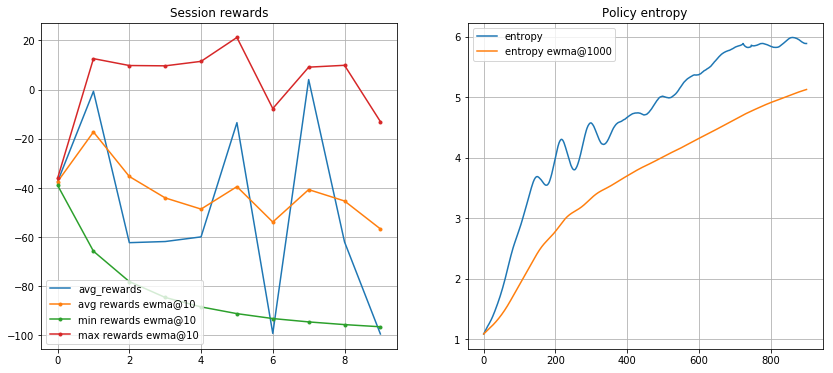

W1208 14:50:41.032515 4456670656 optimizer_v2.py:1029] Gradients do not exist for variables ['V_44/kernel:0', 'V_44/bias:0'] when minimizing the loss.
W1208 14:50:41.037127 4456670656 optimizer_v2.py:1029] Gradients do not exist for variables ['logits_44/kernel:0', 'logits_44/bias:0'] when minimizing the loss.











  9%|▉         | 902/10001 [02:12<2:15:08,  1.12it/s]W1208 14:50:41.066639 4456670656 optimizer_v2.py:1029] Gradients do not exist for variables ['V_44/kernel:0', 'V_44/bias:0'] when minimizing the loss.
W1208 14:50:41.070184 4456670656 optimizer_v2.py:1029] Gradients do not exist for variables ['logits_44/kernel:0', 'logits_44/bias:0'] when minimizing the loss.
W1208 14:50:41.092837 4456670656 optimizer_v2.py:1029] Gradients do not exist for variables ['V_44/kernel:0', 'V_44/bias:0'] when minimizing the loss.
W1208 14:50:41.096506 4456670656 optimizer_v2.py:1029] Gradients do not exist for variables ['logits_44/kernel:0', 'logits_44/bias:0'] when minimizing the loss.


W1208 14:50:41.667674 4456670656 optimizer_v2.py:1029] Gradients do not exist for variables ['logits_44/kernel:0', 'logits_44/bias:0'] when minimizing the loss.
W1208 14:50:41.692627 4456670656 optimizer_v2.py:1029] Gradients do not exist for variables ['V_44/kernel:0', 'V_44/bias:0'] when minimizing the loss.
W1208 14:50:41.697178 4456670656 optimizer_v2.py:1029] Gradients do not exist for variables ['logits_44/kernel:0', 'logits_44/bias:0'] when minimizing the loss.











  9%|▉         | 927/10001 [02:13<19:25,  7.79it/s]W1208 14:50:41.723460 4456670656 optimizer_v2.py:1029] Gradients do not exist for variables ['V_44/kernel:0', 'V_44/bias:0'] when minimizing the loss.
W1208 14:50:41.727946 4456670656 optimizer_v2.py:1029] Gradients do not exist for variables ['logits_44/kernel:0', 'logits_44/bias:0'] when minimizing the loss.
W1208 14:50:41.749216 4456670656 optimizer_v2.py:1029] Gradients do not exist for variables ['V_44/kernel:0', 'V_44/bias:0'] when minimizing the loss.
W1

W1208 14:50:42.330839 4456670656 optimizer_v2.py:1029] Gradients do not exist for variables ['V_44/kernel:0', 'V_44/bias:0'] when minimizing the loss.
W1208 14:50:42.335150 4456670656 optimizer_v2.py:1029] Gradients do not exist for variables ['logits_44/kernel:0', 'logits_44/bias:0'] when minimizing the loss.











 10%|▉         | 951/10001 [02:13<05:51, 25.73it/s]W1208 14:50:42.361146 4456670656 optimizer_v2.py:1029] Gradients do not exist for variables ['V_44/kernel:0', 'V_44/bias:0'] when minimizing the loss.
W1208 14:50:42.364930 4456670656 optimizer_v2.py:1029] Gradients do not exist for variables ['logits_44/kernel:0', 'logits_44/bias:0'] when minimizing the loss.
W1208 14:50:42.387506 4456670656 optimizer_v2.py:1029] Gradients do not exist for variables ['V_44/kernel:0', 'V_44/bias:0'] when minimizing the loss.
W1208 14:50:42.391515 4456670656 optimizer_v2.py:1029] Gradients do not exist for variables ['logits_44/kernel:0', 'logits_44/bias:0'] when minimizing the loss.
W1

W1208 14:50:42.999815 4456670656 optimizer_v2.py:1029] Gradients do not exist for variables ['logits_44/kernel:0', 'logits_44/bias:0'] when minimizing the loss.











 10%|▉         | 975/10001 [02:14<04:21, 34.57it/s]W1208 14:50:43.022885 4456670656 optimizer_v2.py:1029] Gradients do not exist for variables ['V_44/kernel:0', 'V_44/bias:0'] when minimizing the loss.
W1208 14:50:43.026283 4456670656 optimizer_v2.py:1029] Gradients do not exist for variables ['logits_44/kernel:0', 'logits_44/bias:0'] when minimizing the loss.
W1208 14:50:43.047632 4456670656 optimizer_v2.py:1029] Gradients do not exist for variables ['V_44/kernel:0', 'V_44/bias:0'] when minimizing the loss.
W1208 14:50:43.051513 4456670656 optimizer_v2.py:1029] Gradients do not exist for variables ['logits_44/kernel:0', 'logits_44/bias:0'] when minimizing the loss.
W1208 14:50:43.071768 4456670656 optimizer_v2.py:1029] Gradients do not exist for variables ['V_44/kernel:0', 'V_44/bias:0'] when minimizing the loss.
W1












 10%|▉         | 999/10001 [02:15<04:09, 36.07it/s]W1208 14:50:43.683760 4456670656 optimizer_v2.py:1029] Gradients do not exist for variables ['V_44/kernel:0', 'V_44/bias:0'] when minimizing the loss.
W1208 14:50:43.687288 4456670656 optimizer_v2.py:1029] Gradients do not exist for variables ['logits_44/kernel:0', 'logits_44/bias:0'] when minimizing the loss.
W1208 14:50:43.709831 4456670656 optimizer_v2.py:1029] Gradients do not exist for variables ['V_44/kernel:0', 'V_44/bias:0'] when minimizing the loss.
W1208 14:50:43.713274 4456670656 optimizer_v2.py:1029] Gradients do not exist for variables ['logits_44/kernel:0', 'logits_44/bias:0'] when minimizing the loss.


In [ ]:
ac.run(n_iters=10001, gamma=0.99)